In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn


In [3]:
df = pd.read_csv(r'C:\Users\srira\Downloads\miniProject\garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.shape


(1197, 15)

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
df2 = df.drop(['date'], axis=1)

In [7]:
df2.shape

(1197, 14)

In [8]:
df2.isnull().sum()


quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
df3 = df2.fillna({
        'wip': 0,
        })

In [10]:
df4 = df3.drop(['targeted_productivity'], axis=1)

In [11]:
df4.head()

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [12]:
df4=df4.rename(columns={
    'team':'team_number',
    'smv':'time_allocated',
    'wip':'unfinished_items',
    'no_of_style_change':'style_change'
})
df4

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [13]:
df4.isnull().sum()

quarter                0
department             0
day                    0
team_number            0
time_allocated         0
unfinished_items       0
over_time              0
incentive              0
idle_time              0
idle_men               0
style_change           0
no_of_workers          0
actual_productivity    0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'team_number'),
  Text(1, 0, 'time_allocated'),
  Text(2, 0, 'unfinished_items'),
  Text(3, 0, 'over_time'),
  Text(4, 0, 'incentive'),
  Text(5, 0, 'idle_time'),
  Text(6, 0, 'idle_men'),
  Text(7, 0, 'style_change'),
  Text(8, 0, 'no_of_workers'),
  Text(9, 0, 'actual_productivity')])

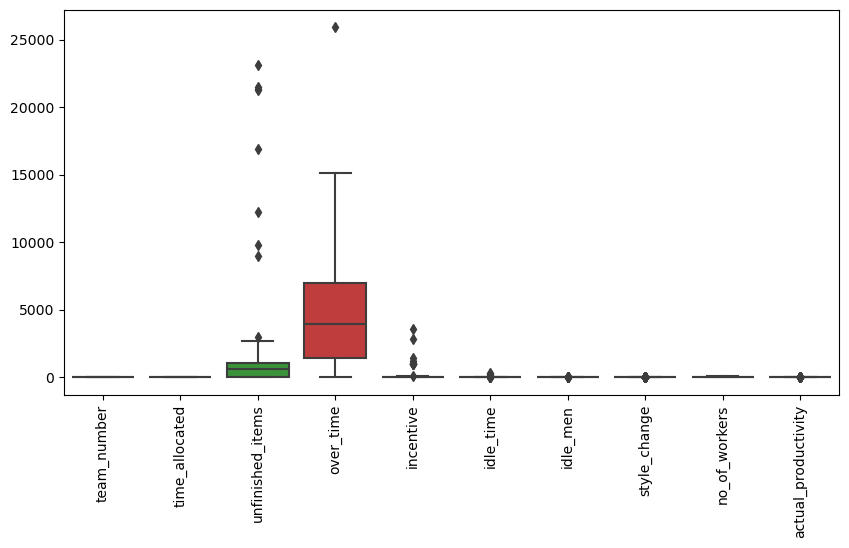

In [14]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df4, orient ='v',width=0.8)
plt.xticks(rotation=90)

In [15]:
Q1 = df4.incentive.quantile(0.25)
Q3 = df4.incentive.quantile(0.75)
Q1, Q3

(0.0, 50.0)

In [16]:
IQR = Q3 - Q1
IQR

50.0

In [17]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-75.0, 125.0)

In [18]:
df4[(df4.incentive<lower_limit)|(df4.incentive>upper_limit)]



,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
730,Quarter2,sweing,Thursday,1,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
1128,Quarter2,finishing,Monday,11,2.90,0.0,0,960,0.0,0,0,8.0,0.960625
1129,Quarter2,finishing,Monday,12,4.60,0.0,0,1080,0.0,0,0,9.0,0.902963
1130,Quarter2,finishing,Monday,5,3.94,0.0,0,2880,0.0,0,0,12.0,0.864343
1133,Quarter2,finishing,Monday,9,2.90,0.0,0,3600,0.0,0,0,15.0,0.841000
1137,Quarter2,finishing,Monday,3,4.60,0.0,0,1440,0.0,0,0,12.0,0.795417
1138,Quarter2,finishing,Monday,4,3.94,0.0,0,960,0.0,0,0,8.0,0.795388
1139,Quarter2,finishing,Monday,1,3.94,0.0,0,960,0.0,0,0,8.0,0.794567
1143,Quarter2,finishing,Monday,2,3.90,0.0,0,1200,0.0,0,0,10.0,0.682500
1148,Quarter2,finishing,Monday,10,2.90,0.0,0,960,0.0,0,0,8.0,0.477292


In [19]:
df5 = df4[(df4.incentive>lower_limit)&(df4.incentive<upper_limit)]


In [20]:
df5.shape

(1186, 13)

In [21]:
Q1 = df5.unfinished_items.quantile(0.25)
Q3 = df5.unfinished_items.quantile(0.75)
Q1, Q3

(0.0, 1084.75)

In [22]:
IQR = Q3 - Q1
IQR

1084.75

In [23]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1627.125, 2711.875)

In [24]:
df5[(df5.unfinished_items<lower_limit)|(df5.unfinished_items>upper_limit)]

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
561,Quarter1,sweing,Monday,1,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
563,Quarter1,sweing,Monday,2,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,Quarter1,sweing,Monday,3,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
565,Quarter1,sweing,Monday,10,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
568,Quarter1,sweing,Monday,12,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
569,Quarter1,sweing,Monday,4,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
570,Quarter1,sweing,Monday,9,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
572,Quarter1,sweing,Monday,11,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398
573,Quarter1,sweing,Monday,6,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355


In [25]:
df6 = df5[(df5.unfinished_items>lower_limit)&(df5.unfinished_items<upper_limit)]

In [26]:
df6.shape

(1177, 13)

In [27]:
Q1 = df6.over_time.quantile(0.25)
Q3 = df6.over_time.quantile(0.75)
Q1, Q3

(1440.0, 6960.0)

In [28]:
IQR = Q3 - Q1
IQR

5520.0

In [29]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-6840.0, 15240.0)

In [30]:
df6[(df6.over_time<lower_limit)|(df6.over_time>upper_limit)]

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
146,Quarter2,sweing,Thursday,11,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951


In [31]:
df7 = df6[(df6.over_time>lower_limit)&(df6.over_time<upper_limit)]

In [32]:
df7.shape

(1176, 13)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'team_number'),
  Text(1, 0, 'time_allocated'),
  Text(2, 0, 'unfinished_items'),
  Text(3, 0, 'over_time'),
  Text(4, 0, 'incentive'),
  Text(5, 0, 'idle_time'),
  Text(6, 0, 'idle_men'),
  Text(7, 0, 'style_change'),
  Text(8, 0, 'no_of_workers'),
  Text(9, 0, 'actual_productivity')])

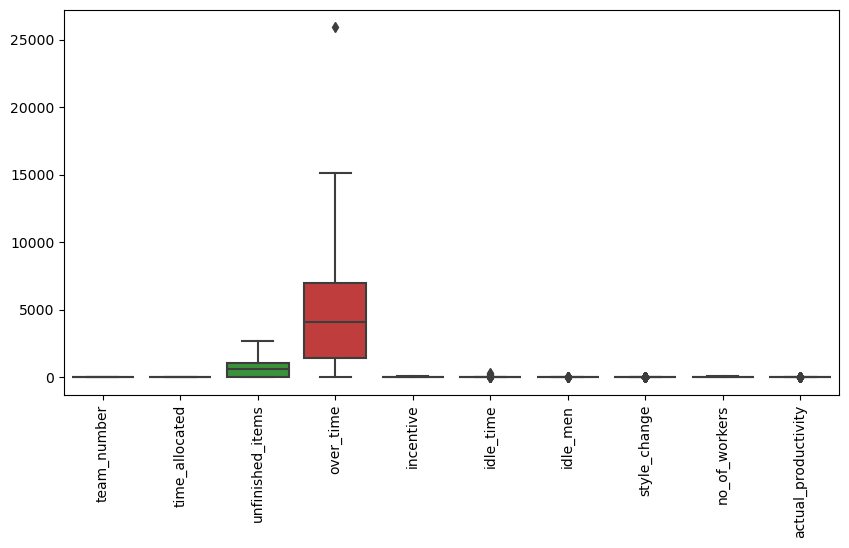

In [33]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df6, orient ='v',width=0.8)
plt.xticks(rotation=90)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
for i in range(0, df7.shape[1]):
    if df7.dtypes[i]=='object':
        df7[df7.columns[i]] = le.fit_transform(df7[df7.columns[i]])

C:\Users\srira\AppData\Local\Temp\ipykernel_1644\2128788254.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df7.dtypes[i]=='object':
C:\Users\srira\AppData\Local\Temp\ipykernel_1644\2128788254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7[df7.columns[i]] = le.fit_transform(df7[df7.columns[i]])
C:\Users\srira\AppData\Local\Temp\ipykernel_1644\2128788254.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

In [36]:
df7.head()

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,0,2,3,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,1,3,1,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,2,3,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,2,3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,2,3,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [37]:
x = df7.drop(['actual_productivity'], axis=1)
y = df7.actual_productivity

In [38]:
x.shape, y.shape

((1176, 12), (1176,))

In [39]:
y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [40]:
#Standarization
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])

In [43]:
x.head()

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers
0,-1.160117,0.780739,0.250366,0.455616,1.008608,0.926217,0.760786,2.413020,-0.057985,-0.114022,-0.355135,1.097504
1,-1.160117,-0.468444,0.250366,-1.571751,-1.018120,-1.019391,-1.102067,-0.847073,-0.057985,-0.114022,-0.355135,-1.201499
2,-1.160117,0.780739,0.250366,1.324487,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
3,-1.160117,0.780739,0.250366,1.614110,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
4,-1.160117,0.780739,0.250366,-0.123632,0.984893,1.035087,-0.809855,0.816240,-0.057985,-0.114022,-0.355135,0.962269


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 12)
(353, 12)
(823,)
(353,)


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
pred_linreg = linreg.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_linreg))
print("MSE  :", mean_squared_error(y_test, pred_linreg))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_linreg)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_linreg))

MAE  : 0.09889801648754916
MSE  : 0.018535367319974336
RMSE : 0.13614465586270486
MAPE : 0.16747657653644724


In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_knn))
print("MSE  :", mean_squared_error(y_test, pred_knn))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_knn)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_knn))

MAE  : 0.09461994102266287
MSE  : 0.017693060885064893
RMSE : 0.13301526560912058
MAPE : 0.1601878271654436


In [49]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_svr))
print("MSE  :", mean_squared_error(y_test, pred_svr))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_svr)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_svr))


MAE  : 0.09420946132959857
MSE  : 0.016124580860510405
RMSE : 0.1269826006211497
MAPE : 0.15790384789736983


In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_dt))
print("MSE  :", mean_squared_error(y_test, pred_dt))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_dt)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_dt))

MAE  : 0.10406820884560908
MSE  : 0.02984153719681768
RMSE : 0.1727470323820866
MAPE : 0.17488306226856676


In [51]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor(random_state=42)
randf.fit(x_train,y_train)
pred_randf = randf.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_randf))
print("MSE  :", mean_squared_error(y_test, pred_randf))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_randf)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_randf))

MAE  : 0.08366785595438364
MSE  : 0.015441874867015823
RMSE : 0.12426534057015183
MAPE : 0.14067390864389964


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_gb))
print("MSE  :", mean_squared_error(y_test, pred_gb)) 
print("RMSE :",sqrt(mean_squared_error(y_test, pred_gb)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_gb))

MAE  : 0.08052610453252707
MSE  : 0.013325110632581337
RMSE : 0.11543444300806123
MAPE : 0.1351165000418134


In [53]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor(random_state=42)
adab.fit(x_train,y_train)
pred_adab = adab.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_adab))
print("MSE  :", mean_squared_error(y_test, pred_adab)) 
print("RMSE :",sqrt(mean_squared_error(y_test, pred_adab)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_adab))

MAE  : 0.09914994225330438
MSE  : 0.01804214472829372
RMSE : 0.1343210509499301
MAPE : 0.15873014712450173


In [54]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_xgb))
print("MSE  :", mean_squared_error(y_test, pred_xgb)) 
print("RMSE :",sqrt(mean_squared_error(y_test, pred_xgb)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_xgb))

MAE  : 0.0889760853906732
MSE  : 0.01729979938858328
RMSE : 0.13152870176726933
MAPE : 0.14570268332051675


In [55]:
import joblib as jb

In [56]:
#Saving models using Joblib
jb.dump(linreg,'linReg')
jb.dump(knn,'knn')
jb.dump(svr,'svr')
jb.dump(dt,'dt')
jb.dump(randf,'randf')
jb.dump(gb,'gb')
jb.dump(adab,'adab')
jb.dump(xgb,'xgb')

['xgb']

In [57]:
#Loading those saved models
import joblib as jb
linreg_default =  jb.load('linReg')
knn_default = jb.load('knn')
svr_default = jb.load('svr')
dt_default =  jb.load('dt')
randf_default =  jb.load('randf')
gb_default =  jb.load('gb')
adab_default =  jb.load('adab')
xgb_default =  jb.load('xgb')

In [58]:
d = {'Algorithm': ['Linear Regression','K Nearest Neighbors', 'Support Vector Machine','Decision Tree',
                   'Random Forest','Gradient Boost','Adaboost','XGBoost'],
     'MSE' : [0.017,0.015,0.014,0.022,0.013, 0.012,0.017,0.015],
     'RMSE': [0.131, 0.123, 0.121,0.148,0.116,0.112,0.131,0.123],
     'MAE' : [0.091,0.079,0.084,0.083,0.072,0.075,0.094,0.078],
     'MAPE': [15.30,13.65,14.43,13.78,12.02,12.67,15.01,12.62]
    }
df_accuracy = pd.DataFrame(data=d)
df_accuracy

,Algorithm,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.017,0.131,0.091,15.30
1,K Nearest Neighbors,0.015,0.123,0.079,13.65
2,Support Vector Machine,0.014,0.121,0.084,14.43
3,Decision Tree,0.022,0.148,0.083,13.78
4,Random Forest,0.013,0.116,0.072,12.02
5,Gradient Boost,0.012,0.112,0.075,12.67
6,Adaboost,0.017,0.131,0.094,15.01
7,XGBoost,0.015,0.123,0.078,12.62


In [59]:
import shap

In [60]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(randf)
# Calculate Shap values
shap_values = explainer.shap_values(x_train)

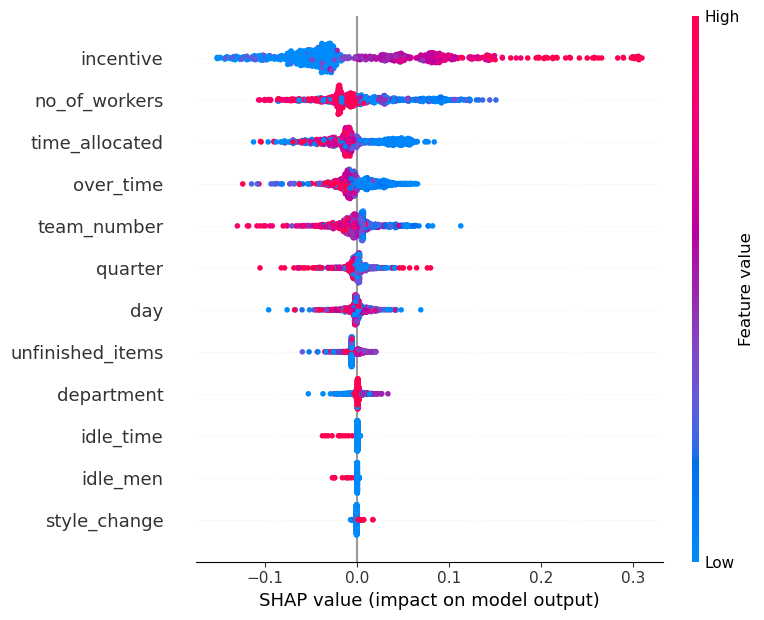

In [61]:
shap.summary_plot(shap_values, x_train)

In [62]:
print(shap_values)

[[ 0.00289996  0.0011013  -0.00151864 ...  0.00032938 -0.00077743
  -0.02000564]
 [ 0.00107953  0.00080118 -0.00146752 ...  0.00035726 -0.00034355
  -0.0194016 ]
 [ 0.0019234  -0.00117553  0.00186971 ...  0.00190697 -0.000561
  -0.01182943]
 ...
 [ 0.01351555 -0.00068578  0.01467398 ...  0.00036089 -0.00025657
   0.07831029]
 [-0.00699838 -0.00919669 -0.01376068 ...  0.00035768 -0.00043395
   0.10130167]
 [ 0.00293606  0.00109989 -0.00253797 ...  0.00065866  0.00178236
  -0.03605201]]


In [63]:
score=linreg.score(x_test,y_test)
print(score)
score=knn.score(x_test,y_test)
print(score)
score=svr.score(x_test,y_test)
print(score)
score=dt.score(x_test,y_test)
print(score)
score=randf.score(x_test,y_test)
print(score)
score=gb.score(x_test,y_test)
print(score)
score=adab.score(x_test,y_test)
print(score)
score=xgb.score(x_test,y_test)
print(score)

0.340971076012901
0.3709194603034881
0.4266871008920553
-0.06102219661687158
0.4509608575716667
0.5262228597576404
0.3585077100741598
0.3849019563823515


In [64]:
import pickle
pickle.dump(gb,open('productivity4.pkl','wb'))